<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>Артем, привет еще раз</b> 
    
Критических замечаний нет. Спасибо за проект! Удачи в дальнейшем обучении!

<b>Привет, Артем!</b>

Меня зовут Евгений Лукашин, я буду проверять твой проект, постараемся вместе сделать его ещё лучше. Предлагаю обращаться к друг другу на «ты», если для тебя это будет комфортно. Иначе дай знать, и мы сразу перейдём на «вы».

Желательно отвечать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку' и т.д.) выделять их каким-либо цветом, например, так:


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>


Пожалуйста, не удаляй мои комментарии, так как они повышают качество повторного ревью, и позволят мне быстрее проверить твой проект.

<br>
Мои комментарии будут выглядеть так:

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>

<b>✅«Отлично»:</b> Если все сделано правильно
</div>

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>

<b>⚠️«Можно лучше»: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>

<b>⛔️«Надо исправить»:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

Помни, что у нас общая цель - подготовить тебя к успешной работе Data Science  специалистом!

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Загрузка данных

In [2]:
data0 = pd.read_csv('/datasets/geo_data_0.csv')
data1 = pd.read_csv('/datasets/geo_data_1.csv')
data2 = pd.read_csv('/datasets/geo_data_2.csv')

def data_info(data):
    display(data.head())
    display(data.info())
    display(sum(data.duplicated()))
            
data_info(data0)
data_info(data1)
data_info(data2)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

0

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

0

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

0

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>

<b>⚠️«Можно лучше»: </b> Было бы здорво использовать функцию или цикл, чтобы не дублировать код

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> 👍

**Посмотрим на неявные дубликаты: если всё, кроме id, совпало**

In [3]:
def duplicates(data):
    data_new = data.drop(['id'], axis=1)
    display(sum(data_new.duplicated()))
    
duplicates(data0)
duplicates(data1)
duplicates(data2)

0

0

0

**Неявных дубликатов тоже нет**

### Графики

In [4]:
def graphics(data, feature):
    plt.figure(figsize=(20,5))
    ax11 = plt.subplot(1,2,1)
    ax11 = sns.boxplot(x=data)
    ax11.set_title(f'Диаграмма размаха {feature}', fontsize=16)
    ax12 = plt.subplot(1,2,2)
    ax12 = sns.histplot(x=data)
    ax12.set_title(f'Плотность распределения {feature}', fontsize=16)
    plt.show()


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>

<b>✅«Отлично»:</b> Молодец, что используешь функции. Так код более лаконичен, его удобнее читать и в случае необходимости вносить изменения.
</div>

#### Data0. 1 регион

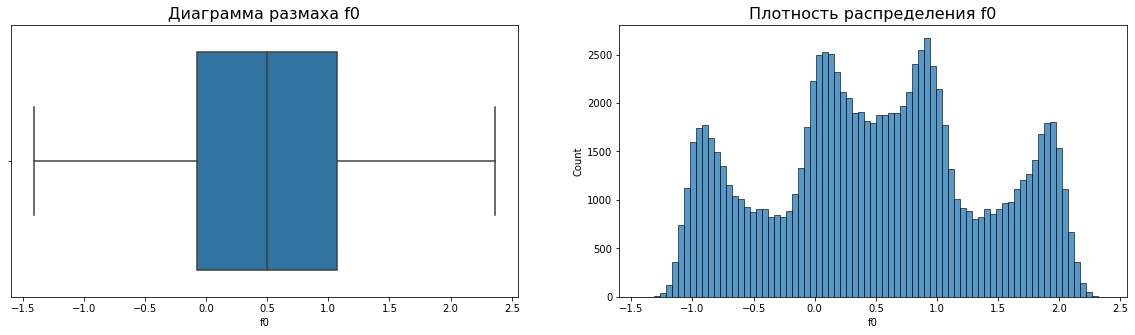

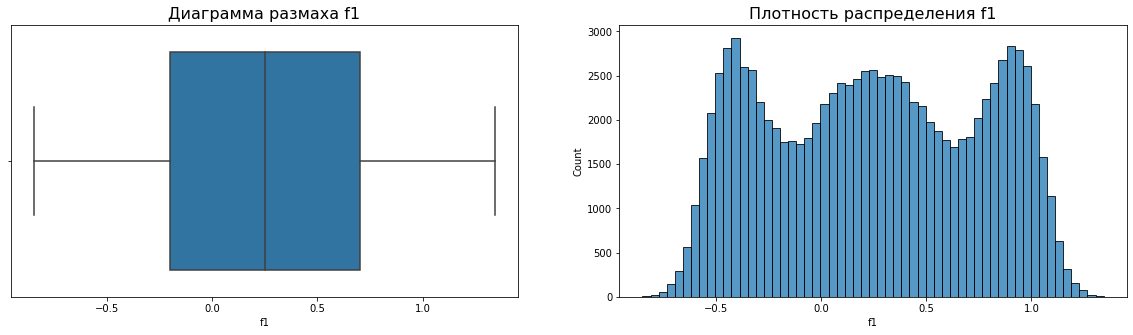

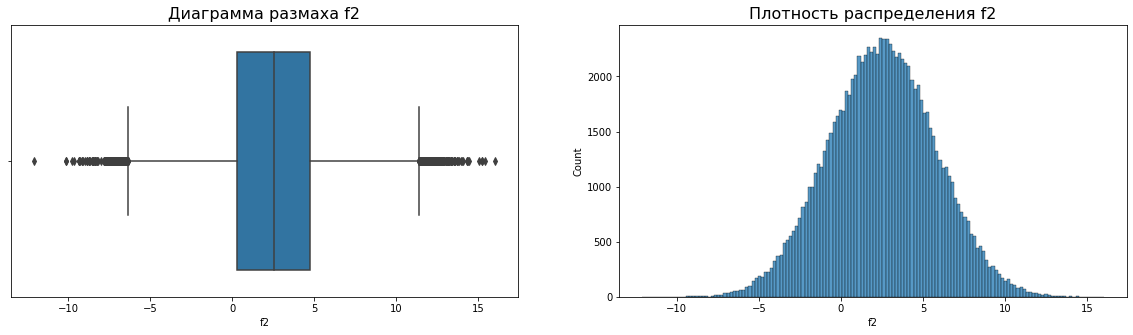

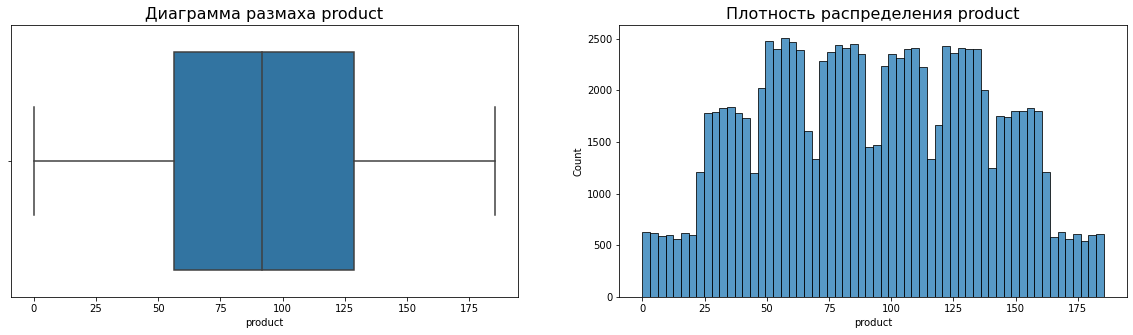

In [5]:
for i in ['f0', 'f1', 'f2', 'product']:
    graphics(data0[i], i)

#### Data1. 2 регион

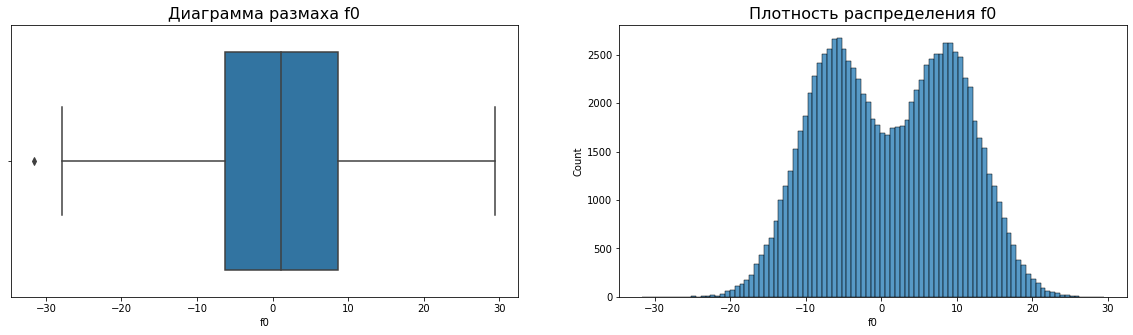

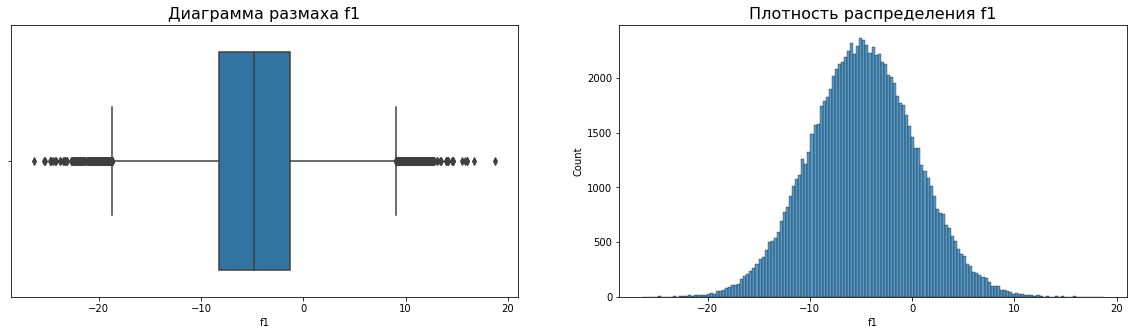

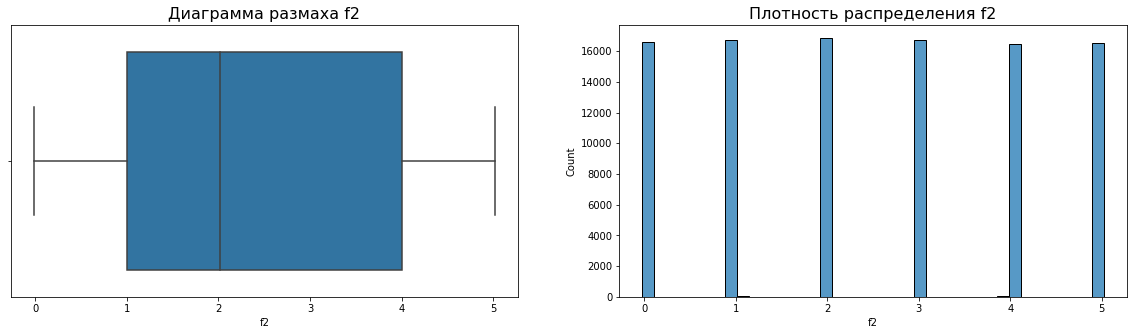

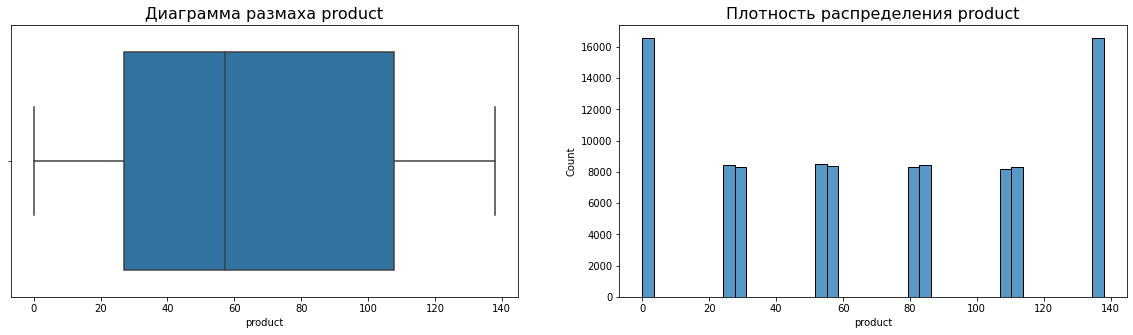

In [6]:
for i in ['f0', 'f1', 'f2', 'product']:
    graphics(data1[i], i)

#### Data2. 3 регион

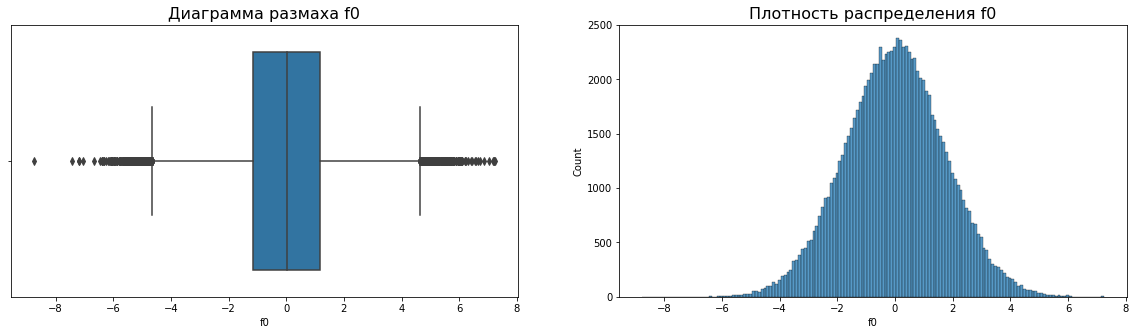

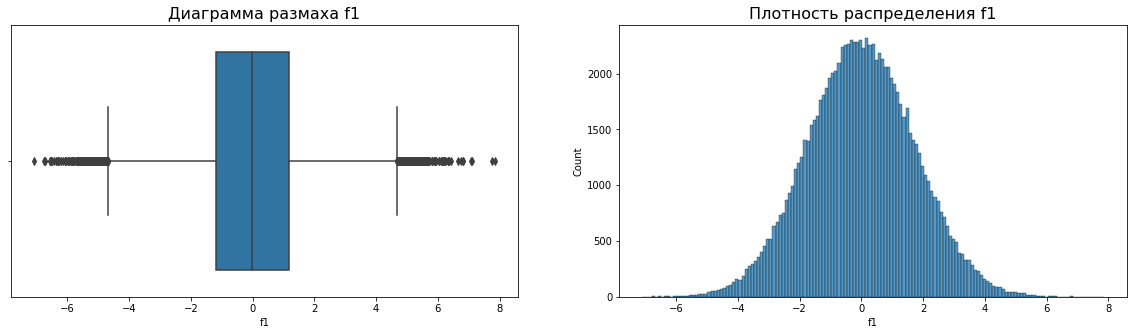

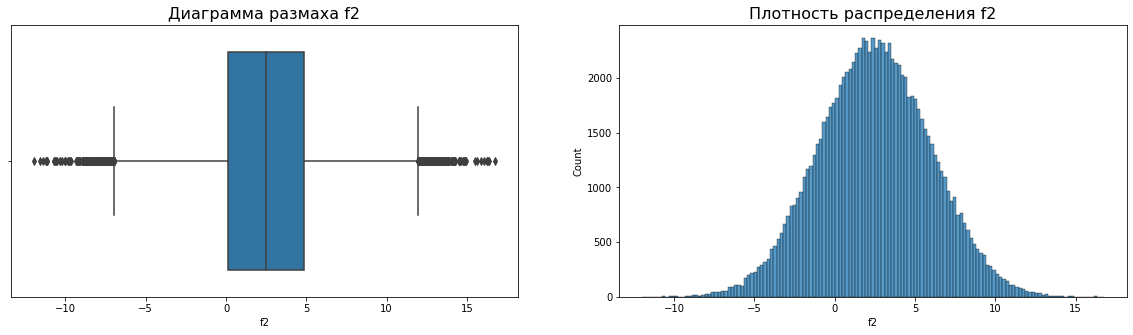

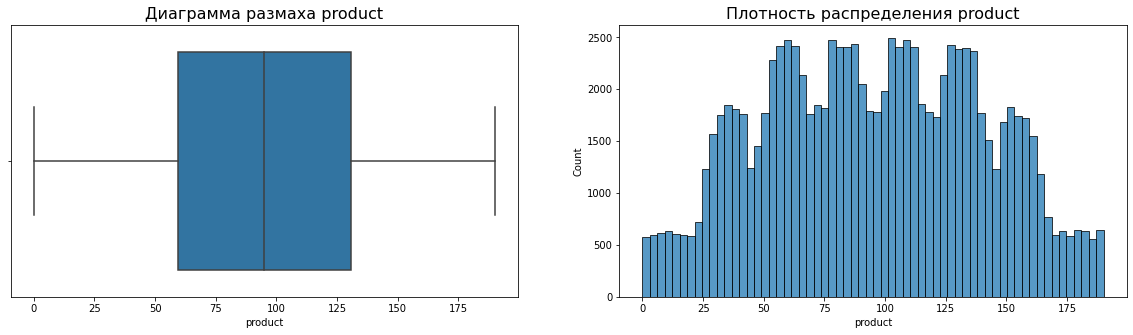

In [7]:
for i in ['f0', 'f1', 'f2', 'product']:
    graphics(data2[i], i)

### Выводы

- Данные успешно загружены. Пропусков нет. Дубликатов тоже нет.
- f0, f1, f2 признаки сильно разнятся - в 3 регионе все три распределены нормально, во втором лишь f1 распределен нормально, а в первом лишь f0.
- Все признаки имеют примерно одинаковый масштаб.
- В первом регионе выбросы присутствуют в f2 признаке, во втором регионе в f1, а в третьем в f1, f2, f3

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>

<b>⚠️«Можно лучше»: </b> А как насчет не явных дубликатов?

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил. См. перед пунктом 1.2
</div>

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера v2:</b>

<b>⚠️«Можно лучше»: </b> На самом деле они есть как раз по id

## Обучение и проверка модели

### Разделение на тренировочные и валидационные выборки. Обучение и прогноз.

Целевым признаком будет product, так как объем запасов в скважине напрямую влияет на прибыль

In [8]:
def splitting(data):
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    return features, target

features0, target0 = splitting(data0)
features1, target1 = splitting(data1)
features2, target2 = splitting(data2)

state = np.random.RandomState(12345)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>

<b>✅«Отлично»:</b> Молодец, что не берешь id в обучение Код выше тоже было бы здорово оформит в функцию или цикл

In [9]:
def model_spl_tr_pr(features, target, rs=12345):
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=state)
    model = LinearRegression()
    model.fit(features_train, target_train)
    prediction = model.predict(features_valid)
    prediction_mean = prediction.mean()
    rmse = mean_squared_error(target_valid, prediction)**0.5
    print('predicted average oil reserves: ', prediction_mean)
    print('root mean squared error', rmse)
    return target_valid, prediction


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>

<b>✅«Отлично»:</b> Отличная фнкция 👍

### 1 регион

In [10]:
target0_valid, prediction0 = model_spl_tr_pr(features0, target0)

predicted average oil reserves:  92.59256778438035
root mean squared error 37.5794217150813


### 2 регион 

In [11]:
target1_valid, prediction1 = model_spl_tr_pr(features1, target1)

predicted average oil reserves:  68.76995145799754
root mean squared error 0.889736773768065


### 3 регион

In [12]:
target2_valid, prediction2 = model_spl_tr_pr(features2, target2)

predicted average oil reserves:  95.087528122523
root mean squared error 39.958042459521614


### Выводы

- В первом и третьем регионе высокие средние показатели запасов нефти(90+), но при это среднеквадратичная ошибка очень большая(около 40). Поэтому нельзя однозначно заявить, что эти регионы самые подходящие для бурения новой скважины.
- Во втором регионе показатель запасов пониже - 68, но при этом ошибка всего 0.89. Регион гораздо более предсказуем.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>

<b>✅«Отлично»:</b> Полностью с тобой согласен

## Подготовка к расчёту прибыли

Бюджет - 10 млрд рублей. При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

In [13]:
BUDGET = 10**10
BOREHOLES = 500
BEST_BOREHOLES = 200
INCOME_FOR_ONE = 450000

required_product = BUDGET / (INCOME_FOR_ONE*BEST_BOREHOLES)
print('{:.2f}'.format(required_product))

111.11


<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>

<b>⚠️«Можно лучше»: </b> В соответствии с [PEP 8](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html) константы необходимо именовать прописными (заглавными) буквами.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> 👍

**Вывод:**
- Для безубыточной разработки новой скважины необходимый объем - 111.11 тыс. баррелей 
- Этот результат выше средних показателей во всех регионах

## Расчёт прибыли и рисков 

Необходимо для каждого региона случайным образом выбрать 500 точек, из которых выбрать 200 лучших и написать для них прогнозируемую прибыль.

In [14]:
prediction0 = pd.Series(prediction0)
prediction1 = pd.Series(prediction1)
prediction2 = pd.Series(prediction2)

In [15]:
target0_valid = pd.Series(target0_valid).reset_index(drop=True)
target1_valid = pd.Series(target1_valid).reset_index(drop=True)
target2_valid = pd.Series(target2_valid).reset_index(drop=True)

In [16]:
def predicted_income(prediction, target, printing=True):
    prediction_new = prediction.sample(n=BOREHOLES, replace=True, random_state=state)
    prediction_sorted = prediction_new.sort_values(ascending=False)
    prediction_sorted = prediction_sorted[:BEST_BOREHOLES]
    target_sorted = target[prediction_sorted.index]
    product_target_sum = sum(target_sorted)
    projected_income = product_target_sum * INCOME_FOR_ONE - BUDGET
    if printing==True:
        print('Суммарный объем 200 лучших точек:{:.2f}'.format(product_target_sum))
        print('Предсказанная прибыль на 200 лучших точках будет:{:.2f}'.format(projected_income))
        print('Средний объем запасов на 200 лучших точках:{:.2f}'.format(target_sorted.mean()))
    else:
        return projected_income

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера:</b>

<b>⛔️«Надо исправить»:</b> Сэмплирование без возвращения не даёт независимые подвыборки: чем больше размер подвыборки, тем выраженнее будет зависимость.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> 👍

### 1 регион

In [17]:
predicted_income(prediction0, target0_valid)

Суммарный объем 200 лучших точек:22965.57
Предсказанная прибыль на 200 лучших точках будет:334507827.64
Средний объем запасов на 200 лучших точках:114.83


### 2 регион

In [18]:
predicted_income(prediction1, target1_valid)

Суммарный объем 200 лучших точек:22974.68
Предсказанная прибыль на 200 лучших точках будет:338607466.81
Средний объем запасов на 200 лучших точках:114.87


### 3 регион

In [19]:
predicted_income(prediction2, target2_valid)

Суммарный объем 200 лучших точек:23128.83
Предсказанная прибыль на 200 лучших точках будет:407973646.25
Средний объем запасов на 200 лучших точках:115.64


**Выводы:**
- Спрогнозированная прибыль на 200 лучших точках среди 500 случайных в третьем регионе прибыль оказалась выше, чем в двух других. Но результат может быть далек от истины, нужно воспользоваться бутстрепом для корректной оценки.

<div class="alert alert-warning" role="alert">
<b>Комментарий ревьюера:</b>

<b>⚠️«Можно лучше»: </b> На самом деле расчитывать прибыль на основе предсказаний не совсем корректно. Это обрадовало бы бизнес (хорошо, когда прибыль полностью прогнозируема 😉), но в действительности так не бывает, только если наша модель идеальна. Поэтому мы и используем бутстрап.

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправил. Если я правильно понял.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>

<b>✅«Отлично»:</b> Смысл комментария в том что пункты 4.1, 4.2, 4.3 можер не делать

### Bootstrap

Теперь нужно оценить нашу прибыль: возьмем 1000 выборок и на каждой из них посчитаем прибыль. Дальше возьмем среднюю и посмотрим 95% доверительный интервал, оценим риски.

In [20]:
def bootstrap(target, prediction, samples=1000):
    incomes = []
    negative_income = 0
    for i in range(samples):
        sample_income = predicted_income(prediction, target, printing=False)
        incomes.append(sample_income)
        if sample_income < 0:
            negative_income += 1
    incomes = pd.Series(incomes)
    mean_income = incomes.mean()
    lower = incomes.quantile(0.025)
    upper = incomes.quantile(0.975)
    print('Средняя прибыль на 1000 случайных выборках:', mean_income)
    print('95%-й доверительный интервал: [', lower, ';', upper, ']')
    risks = negative_income / samples
    print('Риск получить отрицательную прибыль: ', risks)         

### 1 регион bootstrap

In [21]:
bootstrap(target0_valid, prediction0)

Средняя прибыль на 1000 случайных выборках: 394141461.383843
95%-й доверительный интервал: [ -69450566.85671547 ; 915496165.8311473 ]
Риск получить отрицательную прибыль:  0.061


### 2 регион bootstrap

In [22]:
bootstrap(target1_valid, prediction1)

Средняя прибыль на 1000 случайных выборках: 454458201.4435338
95%-й доверительный интервал: [ 64528567.02500654 ; 855133541.236831 ]
Риск получить отрицательную прибыль:  0.007


### 3 регион bootstrap

In [23]:
bootstrap(target2_valid, prediction2)

Средняя прибыль на 1000 случайных выборках: 353740729.6529695
95%-й доверительный интервал: [ -162650946.9422945 ; 847761844.5147644 ]
Риск получить отрицательную прибыль:  0.076


### Выводы:

- Суммарный объем во всех трех регионах на 200 лучших точках среди 500 случайных +-500 тыс. баррелей одинаков(22400-22900)
- Предсказанная прибыль сначала оказалась самой высокой в первом регионе - 330 млн, средний объем запасов там также самый высокий(около 114 тыс. баррелей). Стоит отметить, что во всех трех регионах объем запасов превышает необходимый(111.11) для окупаемости.
- После применения метода bootstrap выяснилось: средняя прибыль на 1000 случайных выборках наивысшая во втором регионе, около 463 млн
- Риск получить отрицательную прибыль наименьший у второго региона - около 1 процента, в то время как в первом регионе 6, а в третьем 8.
- По доверительным 95% интервалам видно, что 95% "прибылей" в первом регионе попадут в положительный интервал, в то время как в первом и третьем регионе разброс сильно больше и там фигурирует отрицательная прибыль.
- **Рекомендуется открывать точку во втором регионе**

## Выводы по проекту:

- Изначальные данные успешно загружены и находятся в надлежащем виде. Некоторые признаки распределены нормально, некоторые с небольшими отклонениями. Признаки не требуют масштабирования.
- В первом и третьем регионе довольно высокие средние показатели запасов нефти(90+ тыс.), но при этом имеют крайне высокую среднеквадратичную ошибку(около 40). В то же время во втором регионе показатель запасов ниже(68), но при этом среднеквадратичная ошибка очень мала(0.9).
- Выяснилось, что для безубыточной разработки новой скважины необходимый объем - 111.11 тыс. баррелей
- Средний объем запасов на случайных точках оказался во всех трех регионах оказался выше необходимых 111.11
- Второй регион оказался самым потенциально прибыльным и менее рисковым - доверительный 95% интервал там (67 млн, 851 млн), а прогнозируемая средняя прибыль на 1000 случайных точках оказалась 463 млн. В первом и третьем регионах есть немалые риски убытков.
- **Точку рекомендуется открывать во втором регионе**

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b>

<b>✅«Отлично»:</b> Хороший развернутый вывод

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! У тебя хорошая работа!

**Положительные моменты проекта**: 
* Все пункты выполнены
* Шаги последовательные, есть комментарии шагов
* Проводится аналитика
* Регион определен верно
* Наглядное сравнение результатво по регионам
* Подробные выводы
    
**Что можно улучшить:**
* Попытаться убрать дублирование кода
* Найти и убрать неявные дубликаты
    
**Обязательные исправления отмечены красными комментариями, без них, к сожалению, не получится принять работу:**
* Бутстрап без возвращения

**Желаю удачи и жду твой проект на повторное ревью!**😉

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован